<h1>Topic: K-Nearest Neighbours</h1>
<h6>Saket Tiwari</h6>
<h6>Date: 20 Jul, 2019</h6>

In [12]:
#KNN is a supervised 
#in knn we measure all he distances from points and we take k nearest points then we do majority voting
#knn is called instance based 
#regression is Parametric
#Instance based is not recommended

In [13]:
#How to measure distances
#1. Euclidean distance(L2 distance) :sqrt((x2-x1)^2 - (y2-y1)^2)
#2. Manhattan Distance(L1 distance) : (x2-x1) - (y2-y1)

In [14]:
import numpy as np

In [15]:
a=[1,2,3]
b=[4,5,6]
a=np.array(a)
b=np.array(b)
l2dist=(np.sum((a-b)**2))**0.5
print(l2dist)
l1dist=np.sum(abs(b)-abs(a))
print(l1dist)

5.196152422706632
9


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# we are creating data as we do not have it

In [12]:
mean1=np.array([1,0])
#we are taking two because our coin has two features weight and radius
cov1=np.array([[1,0.1],[0.1,1.2]]) 
#

dist1=np.random.multivariate_normal(mean1,cov1,500) #500 samples
print(dist1.shape)
#covariance bata raha h ki data kitna spread h mean k along

mean2=np.array([6,5]) #we are taking two because our coin has two features weight and radius
cov2=np.array([[1,0.1],[0.1,1.2]]) #

dist2=np.random.multivariate_normal(mean2,cov2,500) #500 samples multivariate normal dist:- mean batana hogaq
print(dist2.shape)

(500, 2)
(500, 2)


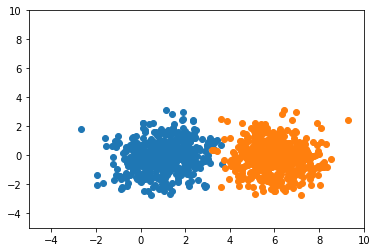

In [13]:
plt.scatter(dist1[:,0],dist1[:,1])
plt.scatter(dist2[:,0],dist1[:,1])
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.show()

In [70]:
data=np.zeros((1000,3))
data[:500,:2]=dist1
data[500:,:2]=dist2
data[500:,-1]=1
print(data.shape)
data.mean(axis=0)

(1000, 3)


array([3.56057561, 2.5336745 , 0.5       ])

In [71]:
print(data[:10])
np.random.shuffle(data)
print(data[:10])

[[ 1.46990291  0.07250623  0.        ]
 [ 1.79823229  0.07813686  0.        ]
 [ 0.93445376 -0.07919164  0.        ]
 [ 2.52853979  1.66570498  0.        ]
 [ 1.67915287 -1.49164758  0.        ]
 [ 1.23614503  0.32311617  0.        ]
 [ 0.23710873  0.84293658  0.        ]
 [ 0.18593115  1.0849772   0.        ]
 [ 0.67069995 -0.4962676   0.        ]
 [ 0.05935277 -0.39344671  0.        ]]
[[ 5.73744828  5.73278754  1.        ]
 [ 6.04128969  5.51375617  1.        ]
 [ 3.91086008  0.79169959  0.        ]
 [-1.6809302  -0.12632692  0.        ]
 [-0.3478339  -1.85680414  0.        ]
 [ 5.54323998  6.40343564  1.        ]
 [ 6.1513808   4.67320368  1.        ]
 [ 6.92642167  3.56427145  1.        ]
 [ 5.71604562  6.01497646  1.        ]
 [ 2.49483127  0.48851121  0.        ]]


In [72]:
def distance(a,b):
    return (np.sum((a-b)**2))**0.5

In [73]:
def knn(x_train, y_train, test_point, k=7):
    
    vals=[]
    
    for i in range(x_train.shape[0]): #dimension is (1000,2) which is a tuple. we need to iterate over 1000 rows 0th row is 1000
        d=distance(x_train[i],test_point) # d is the distance between the x_train and the test_point
        vals.append([d,y_train[i]]) # in the val a list conataining the distance and the corresponding label is appended
        
    sorted_labels=sorted(vals, key=lambda r: r[0]) #values has to shorted on the basis of the 1st element of the list present in vals.
    neighbors=np.asarray(sorted_labels)[:k, -1] #same list is used here. No duplication here. therefore memorhy is saved here.
    #print(neighbors)
    
    freq=np.unique(neighbors,return_counts=True) #returns the matrix containing the frequency of unnique numbers
    #print(freq)
    index=freq[1].argmax() #returns the index of the the highest value in the list
    
    return freq[0][index]
    

In [74]:
x_train=data[:,:2]
y_train=data[:,-1]
test_point=np.array([4,3])

knn(x_train,y_train,test_point)

1.0

In [75]:
split=int(0.75*data.shape[0])

x_train=data[:split, :2]
y_train=data[:split,-1]

x_test=data[split: ,:2]
y_test=data[split:,-1]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [76]:
def acc(k):
    
    predictions=[]
    
    for i in range(x_test.shape[0]):
        #predictions.append(knn(x_train,y_train,x_test[i]))
        test_point=x_test[i]
        predicted_label=knn(x_train,y_train,test_point,k)
        predictions.append(predicted_label)
        
    preds=np.asarray(predictions)
    #print(y_test == preds)
    
    return 100*(y_test == preds).sum()/preds.shape[0]
    

In [77]:
acc(1)

99.6

In [80]:
#value of k can be optimized by changing the value of k using binary search , linear search of binary search after linear search

In [82]:
import sklearn

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
neigh=KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train,y_train)
neigh.score(x_test,y_test)

1.0